In [1]:
import mylibrary
import math
from matplotlib import pyplot as plt
import numpy as np

Question 1

In [2]:
#function given: (x-5)e^x + 5
f1 = lambda x: (x-5)*math.exp(x) + 5

#setting constants
h = 6.626*10**(-34)
k = 1.381*10**(-23)
c = 3*10**(8) 

prec = 10*(-4) #choosing a precision value

#picking a guess for the root
lower_lim = 2
upper_lim = 5

#checking bracket for root
brac = mylibrary.bracket(f1,lower_lim,upper_lim)
print("Bracket containing the root of the function is:" + str(brac))

Bracket containing the root of the function is:(2, 5)


In [3]:
#calling Newton-Raphson function to find root
r1, i1, err1 = mylibrary.newtonraphson(f1,5,prec) #putting the upper bound guess as 5
print("The root for the function within the specified interval is = " + str(r1))

The root for the function within the specified interval is = 4.965113134432163


In [4]:
print("From the given expression in the question, we see b = (h*c)/(x*k)")
print("where x is the value of the root found")
print()
print("Therefore, Wein's constant, b = " + str((h*c)/(r1*k)))

From the given expression in the question, we see b = (h*c)/(x*k)
where x is the value of the root found

Therefore, Wein's constant, b = 0.0028990109714324853


Question 2

In [5]:
#defining constants for the question
L = 1
g = 9.8
k = 4*(L/g)**0.5
a = math.sin(math.pi/8)

#defining the integrand
def integrand(phi):
    f = 1/(1-(a*math.sin(phi)))**0.5
    return f

In [6]:
a = 0         #lower bound
b = math.pi/2 #upper bound
N = 10        #as specified in the question
integral = k*mylibrary.Simpson(a,b,integrand,N)
print("The value of T for N = 10, using Simpson method is", integral)

The value of T for N = 10, using Simpson method is 2.007089923154493


Question 3

In [7]:
#setting up the constants for the problem
y0 = 2
y5 = 45

def y2dot(t, y, u):
    return -9.8

def ydot(t, y, u):
    return u

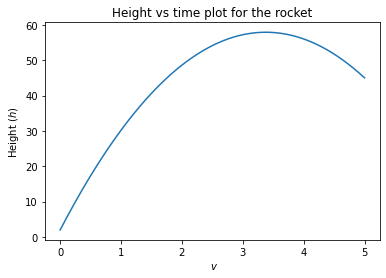

At t=0, the velocity of the rocket was 33.09999999999992 m/s
This is very close to the analytical solution, which is 33.1 m/s


In [8]:
stepsize = 0.01
t_initial = 0
t_final = 5
tol = 0.000001

T, Y, Z = mylibrary.Shooting(y2dot, ydot, t_initial, y0, t_final, y5, 10, 100, stepsize, tol)

plt.plot(T,Y)
plt.xlabel(" $v$")
plt.ylabel("Height $(h)$")
plt.title("Height vs time plot for the rocket")
plt.show()

print("At t=0, the velocity of the rocket was", Z[0], "m/s")
print("This is very close to the analytical solution, which is 33.1 m/s")

Question 4

In [9]:
matrix = open("esem_qfit.dat", "r+")
t = []
p = []
for row in matrix:              #entering population data
    elem = row.split()
    t.append(float(elem[0]))
    p.append(10*float(elem[1])) #since population is given in 10s

#defining summations for matrices X and Y
sum_hr0 = 0
sum_hr1 = 0
sum_hr2 = 0
sum_r0 = 0
sum_r1 = 0
sum_r2 = 0
sum_r3 = 0
sum_r4 = 0

#finding the elements for matrix Y
for i in range(len(t)):
    sum_hr0 = sum_hr0 + p[i]*t[i]**0
for i in range(len(t)):
    sum_hr1 = sum_hr1 + p[i]*t[i]**1
for i in range(len(t)):
    sum_hr2 = sum_hr2 + p[i]*t[i]**2
Y = [[sum_hr0], [sum_hr1], [sum_hr2]]

#finding the elements for matrix X
for i in range(len(t)):
    sum_r0 = sum_r0 + t[i]**0
for i in range(len(t)):
    sum_r1 = sum_r1 + t[i]**1
for i in range(len(t)):
    sum_r2 = sum_r2 + t[i]**2
for i in range(len(t)):
    sum_r3 = sum_r3 + t[i]**3
for i in range(len(t)):
    sum_r4 = sum_r4 + t[i]**4
X = [[sum_r0, sum_r1, sum_r2], [sum_r1, sum_r2, sum_r3], [sum_r2, sum_r3, sum_r4]]

print("The matrix for fitting (X) is given as,")
mylibrary.displayMatrix(X)

#proceeding with finding the constants for polynomial fit
X_inv = mylibrary.polyfit_inv(X)
print("Hence, the inverse matrix for fitting exists and is given as,")
mylibrary.displayMatrix(X_inv)

P = mylibrary.productMatrix(X_inv, Y)
print("The coefficient matrx for fitting is hence obtained by X^(-1)*Y as,")
mylibrary.displayMatrix(P)

The matrix for fitting (X) is given as,
[10.0, 55.0, 385.0]
[55.0, 385.0, 3025.0]
[385.0, 3025.0, 25333.0]
Hence, the inverse matrix for fitting exists and is given as,
[1.3833333333333329, -0.5249999999999995, 0.04166666666666663]
[-0.5249999999999986, 0.2412878787878796, -0.02083333333333326]
[0.04166666666666785, -0.020833333333333925, 0.0018939393939394478]
The coefficient matrx for fitting is hence obtained by X^(-1)*Y as,
[732.0599999999977]
[74.40000000000146]
[10.440000000000282]


In [10]:
a0 = P[0][0]
a1 = P[1][0]
a2 = P[2][0]

midjune = 6.5 #months have been given integral values
p_midjune = a0 + a1*midjune + a2*(midjune)**2

print("Constants for our best fit curve are: ")
print("a0 =", a0)
print("a1 =", a1)
print("a2 =", a2)
print("Population in mid-June (t=6.5) is =", p_midjune)

Constants for our best fit curve are: 
a0 = 732.0599999999977
a1 = 74.40000000000146
a2 = 10.440000000000282
Population in mid-June (t=6.5) is = 1656.750000000019


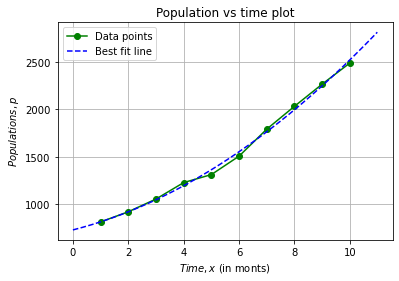

In [11]:
t_fit = []
output = []
for i in range(1100):
    t_ = i*0.01
    out = a0 + a1*t_ + a2*t_**2
    t_fit.append(t_)
    output.append(out)

plt.plot(t, p,'o-g', label='Data points') #plot for data points
plt.plot(t_fit, output,'--b', label='Best fit line') #best fit
plt.xlabel("$Time, x$ (in monts)")
plt.ylabel("$Populations, p$")
plt.grid() 
plt.title("Population vs time plot")
plt.legend(loc='upper left')
plt.show()

Question 5

In [12]:
matrix = open("esem_lfit.dat", "r+")
t = []
w = []

for row in matrix:
    elem = row.split()
    t.append(float(elem[0]))
    w.append(float(elem[1]))

#(i)
wc, w0, r1 = mylibrary.linear_fit(t, w)

t1 = [min(t), max(t)]
w1 = [w0 + wc*t1[0], w0 + wc*t1[1]]

print("In (i), the values of \omega_0 and \omega_c are: " + str(w0) + ' and ' + str(wc) + ' respectively')
print('The Pearson r value for the linear fit is: ' + str(r1))

In (i), the values of \omega_0 and \omega_c are: 2.029102564102564 and -0.47470862470862474 respectively
The Pearson r value for the linear fit is: -0.9851557666128374


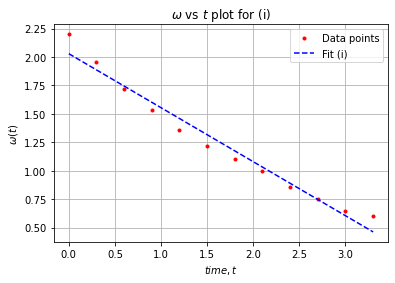

In [13]:
plt.plot(t, w, '.r', label='Data points')  #plotting omega vs t data
plt.plot(t1, w1, '--b', label='Fit (i)')   #plotting the best fit line

'''plt.plot(t, we, '+g', label='Data points')
plt.plot(t, w2, '.g', label='Fit (ii)')'''

#plot for (i) 
plt.xlabel("$time, t$")
plt.ylabel("$\omega(t)$")
plt.grid() 
plt.title("$\omega$ vs $t$ plot for (i)")
plt.legend(loc='upper right')
plt.show()

In [14]:
#(ii)
we = []

for i in range(len(w)):
    we.append(math.log(w[i]))
    
wcn, lnw0, r2 = mylibrary.linear_fit(t,we)
w0 = math.exp(lnw0)

t2 = [min(t), max(t)]
w2 = [lnw0+wcn*t2[0], lnw0+wcn*t2[1]]

print("In (ii), the values of \omega_0 and \omega_c are: " + str(w0) + ' and ' + str(wcn))
print('The Pearson r value for the exponential fit is: ' + str(r2))

In (ii), the values of \omega_0 and \omega_c are: 2.2040080182882553 and -0.39559617454855667
The Pearson r value for the exponential fit is: -0.9991179387307726


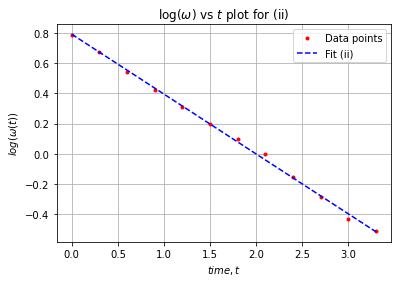

In [15]:
plt.plot(t, we, '.r', label='Data points')  #plotting log(omega) vs t data
plt.plot(t2, w2, '--b', label='Fit (ii)')   #plotting the best fit line

#plot for (ii) 
plt.xlabel("$time, t$")
plt.ylabel("$log(\omega(t))$")
plt.grid() 
plt.title("log($\omega$) vs $t$ plot for (ii)")
plt.legend(loc='upper right')
plt.show()